# Biodata
Nama: Sahrial Ihsani

Asal: Bengkulu

Laptop Price
Dataset: https://www.kaggle.com/ionaskel/laptop-prices

# Dokumentasi Code

```
#Import dataset dari Kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ionaskel/laptop-prices
!ls

# Ekstrak dataset
import zipfile
local_zip = '/content/laptop-prices.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()
#Import Library yang dibutuhkan

#Numpy untuk proses angka
import numpy as np

#Matplotlib dan seaborn untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#panda untuk load dan manipulasi dataset
import pandas as pd

#Baca dataset
data = pd.read_csv('/content/laptops.csv',encoding='latin-1')
data
#Drop nilai NaN
data.dropna()
#Melihat informasi mengenai kolom-kolom yang ada
data.info()
#melihat deskripsi dataset
data.describe()

# Preprocess data

# Mengubah nama kolom pada dataset untuk mempermudah dalam mengingat atribut
dict = {'Unnamed: 0': 'id',
        'Company': 'perusahaan',
        'Product': 'produk',
        'TypeName': 'tipe',
        'Inches': 'ukuran_laptop',
        'ScreenResolution': 'ukuran_layar',
        'Cpu': 'cpu',
        'Gpu': 'gpu',
        'Ram': 'ram',
        'Memory': 'memori',
        'OpSys': 'os',
        'Weight': 'berat',
        'Price_euros': 'harga'
        }
# method rename untuk mengubah kolom
data.rename(columns=dict,
          inplace=True)

#cek data apakah masih ada nilai null
data.isnull().sum() 
data

#drop data pada indeks pertama
data.drop(data.columns[0], axis=1, inplace=True)
data

#Mengubah nilai pada kolom 
data['ram'] = data.ram.str.replace('GB' , '')
data

#Mengubah nilai pada kolom berat
data['berat'] = data.berat.str.replace('kg' , '')
data

#mengubah nilai pada kolom ukuran layar dan menyamakan menjadi format resolusi (px * px)
data['ukuran_layar']=data['ukuran_layar'].str.extract('(\d\d\d\d?x\d\d\d\d?)',expand=True)
data

#Split kolom memori menjadi atribut memori dan tipe penyimpanan, biar mudah dalam melihat data
split_memori = data['memori'].str.split(' ', 1, expand=True)
split_memori
#Inisiasi kolom baru yaitu tipe penyimpanan
data['tipe_penyimpanan'] = split_memori[1]
data['memori'] = split_memori[0]
data

Menghapus GB dan mengubah format string ke numeric pada kolom memori
data_memori= data['memori'].str.split('(\d+)',  expand=True)
data['memori'] = pd.to_numeric(data_memori[1])
data

#ubah nama pada kolom memori
data.rename(columns={'memori':'memori(GB/TB)'}, inplace=True)
data['memori(GB/TB)'].unique()
data[data['memori(GB/TB)'] == 8]

#membedakan memori
def mem(x):
    if x == 1:
        return 1024
    elif x == 2:
        return 2048
data['memori(GB/TB)'] = data['memori(GB/TB)'].apply(lambda x: 1024 if x==1 else x)
data['memori(GB/TB)'] = data['memori(GB/TB)'].apply(lambda x: 2048 if x==2 else x)

#mengubah nama kolom
data.rename(columns={'memori(GB/TB)':'memori(GB)'}, inplace=True)
data

#Split data cpu menjadi beberapa bagian, yaitu vendor, tipe, kecepatan

#Split vendor cpu
split_vendor = data['cpu'].str.split(' ', 1, expand=True)
split_vendor
data['vendor_cpu'] = split_vendor[0]
data['cpu'] = split_vendor[1]

#Split tipe cpu
split_type= data['cpu'].str.split(' ', 1, expand=True)
split_type
data['tipe_cpu'] = split_type[0]
data['cpu'] = split_type[1]

data['cpu'] = data['cpu'].str.split()
data['kecepatan_cpu'] = data['cpu'].str.get(-1)

temp = list(data['cpu'])
temp_2 = []
for i in temp:
    del i[-1]
    temp_2.append(i)
temp_3 = []
for i in temp_2:
    temp_3.append(" ".join(i))
data['cpu'] = temp_3

#menambahkan kecepatan cpu
data['kecepatan_cpu'] = data['kecepatan_cpu'].replace('[GHz]', '', regex=True)

#mengubah tipe data kecepatan dari string ke numerik
data['kecepatan_cpu'] = pd.to_numeric(data['kecepatan_cpu'])

#mengubah nama kolom
data.rename(columns={'kecepatan_cpu':'kecepatan_cpu(GHz)'}, inplace=True)
data

#split model cpu
cpu_split = list(data['cpu'].str.split())
cpu_model_true = []
for i in cpu_split:
    if len(i) == 1 and i[0] not in ['1600', '1700']:
        cpu_model_true.append('Unspecified')
    elif len(i) == 1 and i[0] in ['1600', '1700']:
        if i[0] == '1600':
            cpu_model_true.append('1600')
        elif i[0] == '1700':
            cpu_model_true.append('1700')

    else:
        cpu_model_true.append(i[-1])
data['model_cpu'] = cpu_model_true

#split seri cpu
cpu_series = []
for i in cpu_split:
    if len(i) == 1 and i[0] not in ['1600', '1700']: 
        cpu_series.append(i)
    elif len(i) == 1 and i[0] in ['1600', '1700']: 
        if i[0] == '1600':
            cpu_series.append(['5']) 
        elif i[0] == '1700':
            cpu_series.append(['7']) 
    else:
        del i[-1]
        cpu_series.append(i)
    
cpu_series_join = []
for i in cpu_series:
    cpu_series_join.append(" ".join(i))
data['series_cpu'] = cpu_series_join

#drop atribut cpu, karena sudah displit
data = data.drop('cpu', 1)
data

#Visualisasi
#Ukuran Laptop terhadap harga
import plotly.express as px

fig = px.bar(data, x="ukuran_laptop", y="harga", title='Ukuran Laptop terhadap harga')
fig.show()

#Ram terhadap harga
import plotly.express as px

fig = px.bar(data, x="ram", y="harga", title='Ram terhadap harga')
fig.show()

loc_memori=data.loc[data['tipe_penyimpanan'] =='SSD']
#Ram terhadap harga
import plotly.express as px

fig = px.bar(loc_memori, x="memori(GB)", y="harga", title='Memori SSD terhadap harga')
fig.show()

loc_memori_hdd=data.loc[data['tipe_penyimpanan'] =='HDD']
#Ram terhadap harga
import plotly.express as px

fig = px.bar(loc_memori_hdd, x="memori(GB)", y="harga", title='Memori HDD terhadap harga')
fig.show()

loc_memori_flash=data.loc[data['tipe_penyimpanan'] =='Flash Storage']
#Ram terhadap harga
import plotly.express as px

fig = px.bar(loc_memori_flash, x="memori(GB)", y="harga", title='Memori HDD terhadap harga')
fig.show()

import plotly.express as px
fig = px.bar(data, x="tipe_penyimpanan", y="harga", title='Tipe Peyimpanan')
fig.show()

loc_series=data.loc[(data['series_cpu'] =='i5')|(data['series_cpu'] =='i3')|(data['series_cpu'] =='i7')]
#seri i5 dan harga
import plotly.express as px

fig = px.bar(loc_series, x="series_cpu", y="harga", title='Seri i5 terhadap harga')
fig.show()
#melihat data
data

#Data preparation
#Loc berdasarkan data dengan tipe penyimpanan terbanyak dan tercepat dengan procesor i3, i5, dan i7 (SSD)
loc_data=data.loc[(data['series_cpu'] =='i7')|(data['series_cpu'] =='i5')|(data['series_cpu'] =='i3')|(data['tipe_penyimpanan'] =='SSD')]

#	drop atribut yang tidak diperlukan
loc_data.drop(['perusahaan',	'produk',	'tipe',	'ukuran_layar',	'gpu','os',	'berat',	'tipe_penyimpanan',	'vendor_cpu',	'tipe_cpu','model_cpu',	'series_cpu'], axis=1, inplace=True)

#melihat data yang telah di drop
loc_data

#bagi dataset menjadi data train, dan data tes sebanyak 
from sklearn.model_selection import train_test_split
X = loc_data.drop(["harga"],axis =1)
y = loc_data["harga"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#cetak hasil dataset terkait yang telah di split
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

#lakukan dekomposisi pca dengan jumlah atribut sebanyak 4 buah
from sklearn.decomposition import PCA
 
pca = PCA(n_components=4, random_state=123)
pca.fit(X_train[['ram',	'memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']])
princ_comp = pca.transform(X_train[['ram',	'memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']])

#lihat rasio varian
pca.explained_variance_ratio_

#plot menggunakan seaborn pairplot untuk mengetahui visualisasi seluruh atribut
sns.pairplot(X_train[['ram','memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']], plot_kws={"s": 4});

#lihat data train
X_train
#lihat data tes
X_test

#Skala fitur numerik kita sehingga mereka memiliki nol berarti dan varian satu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['ram',	'memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

#Model Development
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['Lasso', 'RandomForest'])

#model linear lasso
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
reg.predict(X_train)
models.loc['train_mse','Lasso'] = sqrt(mean_squared_error(y_pred=reg.predict(X_train), y_true=y_train))

# Import library yang dibutuhkan
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi random forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = sqrt(mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train))

#Evaluation
#lakukan standarisasi pada data tes yang dibutuhkan untuk evaluasi matriksnya
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#buat dataframe baru pada tiap model (data latih dan tes) dengan nilai matriks rmse nya
rmse = pd.DataFrame(columns=['train', 'test'], index=['Lasso','RF'])
model_dict = {'Lasso': reg, 'RF': RF}
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3)
    rmse.loc[name, 'test'] = sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3)
rmse

#plot metrik diatas dengan bar chart
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

# buat prediksi menggunakan harga dari data test
prediksi = X_test.copy()
pred_dict = {'y_true':y_test}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)
 
pd.DataFrame(pred_dict)



```



# Domain Proyek
Laptop saat ini menjadi alat yang penting dalam mendukung kinerja sesorang. Hampir Semua orang mempunyai laptop,  tetapi masih banyak yang tidak mengetahui cara memilih laptop yang sesuai kebutuhan berdasarkan komponennya.

Saya mencoba mengangkat permasalahan diatas untuk membuat proyek Machine Learning **Regresi** yang memprediksi harga laptop berdasarkan atribut yang menjadi pertimbangan dalam mempengaruhi harga laptop dipasaran, seperti Ram, Memori, Cpu, dan Ukuran Laptop.

Batasan masalah dari proyek ini yaitu pada data yang digunakan sebatas prosesor merk intel (i3,i5, dan i7) dan tipe penyimpanan SSD, karena kebanyakan laptop sekarang sudah default SSD untuk tipe penyimpanannya.

Harapannya model ini dapat membantu memprediksi harga laptop sebenarnya berdasarkan atribut yang telah saya sebutkan.

# Bussines Understanding

Laptop saat ini menjadi alat yang penting dalam mendukung kinerja sesorang. Hampir Semua orang mempunyai laptop, tetapi masih banyak yang tidak mengetahui cara memilih laptop yang efisien berdasarkan komponennya. 

Saya ingin membuat model ML yang akan membantu dalam prediksi harga laptop berdasarkan atribut dari komponen:
1. Ram

Ram menjadi komponen utama dalam mendukung kinerja laptop. Ram juga mempengaruhi harga jual suatu laptop. Semakin besar Ram maka harga nya juga akan semakin mahal

2. Memori

Memori juga menjadi komponen utama dalam mendukung kinerja laptop. Memori juga mempengaruhi harga jual suatu laptop. Semakin besar Memori maka juga akan semakin mahal. Tapi untuk saat ini saya batasi menjadi SSD karena kinerja nya lebih cepat dari HDD, dan banyak digunakan pada laptop sekarang

3. Kecepatan CPU

Kecepatan CPU menjadi komponen utama dalam mendukung kinerja laptop. CPU juga mempengaruhi harga jual suatu laptop. Semakin cepat CPU maka harga nya juga akan semakin mahal.

4. Ukuran Laptop

Selain ketiga hal diatas, ukuran laptop juga dapat menjadi pertimbangan dalam menentukan harga laptop. 

Tujuan dari proyek ini adalah:
- Untuk memprediksi harga laptop berdasarkan atribut yang telah disebutkan diatas.

Solusi yang ditawarkan adalah dengan menggunakan model Lasso Regression dan Random Forest serta matriks evaluasi RMSE diharapkan dapat meningkatkan kemampuan model dalam memprediksi harga laptop yang sebenarnya.

# Data Understanding

Data ini dapat diunduh pada link https://www.kaggle.com/ionaskel/laptop-prices

Deskripsi Variabel
- Company: Merupakan data nama perusahaan
- Product: Merupakan data produk keluaran dari suatu perusahaan
- TypeName: Merupakan data tipe dari keluaran produk
-	Inches: Merupakan data ukuran layar
-	ScreenResolution: Merupakan data resolusi layar	
- Cpu: Merupakan data cpu yang digunakan
- Ram: Merupakan data ram yang digunakan
- Memory: Merupakan data memori yang digunakan
- Gpu: Merupakan data gpu yang digunakan
- OpSys: Merupakan data sistem operasi yang digunakan
- Weight: Merupakan data berat laptop (kg)
- Price_euros: Merupakan data harga laptop dalam satuan euro

Tahapan dari Data Understanding
- Data loading
- Exploratory Data Analysis - Deskripsi Variabel
- Exploratory Data Analysis - Menangani Missing Value dan Outliers
- Exploratory Data Analysis - Univariate Analysis
- Exploratory Data Analysis - Multivariate Analysis





In [ ]:
#Import dataset dari Kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ionaskel/laptop-prices
!ls

Saving kaggle.json to kaggle.json
  0% 0.00/27.9k [00:00<?, ?B/s]
100% 27.9k/27.9k [00:00<00:00, 23.5MB/s]
kaggle.json  laptop-prices.zip	sample_data


In [ ]:
# Ekstrak dataset
import zipfile
local_zip = '/content/laptop-prices.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Import Library yang dibutuhkan

#Numpy untuk proses angka
import numpy as np

#Matplotlib dan seaborn untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#panda untuk load dan manipulasi dataset
import pandas as pd


In [ ]:
#Baca dataset
data = pd.read_csv('/content/laptops.csv',encoding='latin-1')
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
#Drop nilai NaN
data.dropna()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
#Melihat informasi mengenai kolom-kolom yang ada
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
#melihat deskripsi dataset
data.describe()

,Unnamed: 0,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# Pre Processing

In [ ]:
# Mengubah nama kolom pada dataset untuk mempermudah dalam mengingat atribut
dict = {'Unnamed: 0': 'id',
        'Company': 'perusahaan',
        'Product': 'produk',
        'TypeName': 'tipe',
        'Inches': 'ukuran_laptop',
        'ScreenResolution': 'ukuran_layar',
        'Cpu': 'cpu',
        'Gpu': 'gpu',
        'Ram': 'ram',
        'Memory': 'memori',
        'OpSys': 'os',
        'Weight': 'berat',
        'Price_euros': 'harga'
        }
# method rename untuk mengubah kolom
data.rename(columns=dict,
          inplace=True)

In [ ]:
#cek data apakah masih ada nilai null
data.isnull().sum() 
data

,id,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori,gpu,os,berat,harga
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
#drop data pada indeks pertama
data.drop(data.columns[0], axis=1, inplace=True)
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori,gpu,os,berat,harga
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
#Mengubah nilai pada kolom 
data['ram'] = data.ram.str.replace('GB' , '')
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori,gpu,os,berat,harga
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
#Mengubah nilai pada kolom berat
data['berat'] = data.berat.str.replace('kg' , '')
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori,gpu,os,berat,harga
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [ ]:
#mengubah nilai pada kolom ukuran layar dan menyamakan menjadi format resolusi (px * px)
data['ukuran_layar']=data['ukuran_layar'].str.extract('(\d\d\d\d?x\d\d\d\d?)',expand=True)
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori,gpu,os,berat,harga
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [ ]:
#Split kolom memori menjadi atribut memori dan tipe penyimpanan, biar mudah dalam melihat data
split_memori = data['memori'].str.split(' ', 1, expand=True)
split_memori
#Inisiasi kolom baru yaitu tipe penyimpanan
data['tipe_penyimpanan'] = split_memori[1]
data['memori'] = split_memori[0]
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori,gpu,os,berat,harga,tipe_penyimpanan
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB,Intel HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB,Intel HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB,Intel HD Graphics 520,Windows 10,1.8,638.00,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB,Intel HD Graphics 520,Windows 10,1.3,1499.00,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB,Intel HD Graphics,Windows 10,1.5,229.00,Flash Storage
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB,AMD Radeon R5 M330,Windows 10,2.19,764.00,HDD


In [ ]:
#Menghapus GB dan mengubah format string ke numeric pada kolom memori
data_memori= data['memori'].str.split('(\d+)',  expand=True)
data['memori'] = pd.to_numeric(data_memori[1])
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori,gpu,os,berat,harga,tipe_penyimpanan
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.8,638.00,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.3,1499.00,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.5,229.00,Flash Storage
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1,AMD Radeon R5 M330,Windows 10,2.19,764.00,HDD


In [ ]:
#ubah nama pada kolom memori
data.rename(columns={'memori':'memori(GB/TB)'}, inplace=True)
data['memori(GB/TB)'].unique()
data[data['memori(GB/TB)'] == 8]

#membedakan memori
def mem(x):
    if x == 1:
        return 1024
    elif x == 2:
        return 2048
data['memori(GB/TB)'] = data['memori(GB/TB)'].apply(lambda x: 1024 if x==1 else x)
data['memori(GB/TB)'] = data['memori(GB/TB)'].apply(lambda x: 2048 if x==2 else x)

#mengubah nama kolom
data.rename(columns={'memori(GB/TB)':'memori(GB)'}, inplace=True)
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori(GB),gpu,os,berat,harga,tipe_penyimpanan
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.8,638.00,SSD
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.3,1499.00,SSD
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.5,229.00,Flash Storage
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1024,AMD Radeon R5 M330,Windows 10,2.19,764.00,HDD


In [ ]:
#Split data cpu menjadi beberapa bagian, yaitu vendor, tipe, kecepatan

#Split vendor cpu
split_vendor = data['cpu'].str.split(' ', 1, expand=True)
split_vendor
data['vendor_cpu'] = split_vendor[0]
data['cpu'] = split_vendor[1]

#Split tipe cpu
split_type= data['cpu'].str.split(' ', 1, expand=True)
split_type
data['tipe_cpu'] = split_type[0]
data['cpu'] = split_type[1]

data['cpu'] = data['cpu'].str.split()
data['kecepatan_cpu'] = data['cpu'].str.get(-1)

temp = list(data['cpu'])
temp_2 = []
for i in temp:
    del i[-1]
    temp_2.append(i)
temp_3 = []
for i in temp_2:
    temp_3.append(" ".join(i))
data['cpu'] = temp_3

#menambahkan kecepatan cpu
data['kecepatan_cpu'] = data['kecepatan_cpu'].replace('[GHz]', '', regex=True)

#mengubah tipe data kecepatan dari string ke numerik
data['kecepatan_cpu'] = pd.to_numeric(data['kecepatan_cpu'])

#mengubah nama kolom
data.rename(columns={'kecepatan_cpu':'kecepatan_cpu(GHz)'}, inplace=True)
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,cpu,ram,memori(GB),gpu,os,berat,harga,tipe_penyimpanan,vendor_cpu,tipe_cpu,kecepatan_cpu(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,i5,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD,Intel,Core,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,i5,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,Flash Storage,Intel,Core,1.8
2,HP,250 G6,Notebook,15.6,1920x1080,i5 7200U,8,256,Intel HD Graphics 620,No OS,1.86,575.00,SSD,Intel,Core,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,i7,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD,Intel,Core,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,i5,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD,Intel,Core,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,i7 6500U,4,128,Intel HD Graphics 520,Windows 10,1.8,638.00,SSD,Intel,Core,2.5
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,i7 6500U,16,512,Intel HD Graphics 520,Windows 10,1.3,1499.00,SSD,Intel,Core,2.5
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Dual Core N3050,2,64,Intel HD Graphics,Windows 10,1.5,229.00,Flash Storage,Intel,Celeron,1.6
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,i7 6500U,6,1024,AMD Radeon R5 M330,Windows 10,2.19,764.00,HDD,Intel,Core,2.5


In [ ]:
#split model cpu
cpu_split = list(data['cpu'].str.split())
cpu_model_true = []
for i in cpu_split:
    if len(i) == 1 and i[0] not in ['1600', '1700']:
        cpu_model_true.append('Unspecified')
    elif len(i) == 1 and i[0] in ['1600', '1700']:
        if i[0] == '1600':
            cpu_model_true.append('1600')
        elif i[0] == '1700':
            cpu_model_true.append('1700')

    else:
        cpu_model_true.append(i[-1])
data['model_cpu'] = cpu_model_true

#split seri cpu
cpu_series = []
for i in cpu_split:
    if len(i) == 1 and i[0] not in ['1600', '1700']: 
        cpu_series.append(i)
    elif len(i) == 1 and i[0] in ['1600', '1700']: 
        if i[0] == '1600':
            cpu_series.append(['5']) 
        elif i[0] == '1700':
            cpu_series.append(['7']) 
    else:
        del i[-1]
        cpu_series.append(i)
    
cpu_series_join = []
for i in cpu_series:
    cpu_series_join.append(" ".join(i))
data['series_cpu'] = cpu_series_join

#drop atribut cpu, karena sudah displit
data = data.drop('cpu', 1)
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,ram,memori(GB),gpu,os,berat,harga,tipe_penyimpanan,vendor_cpu,tipe_cpu,kecepatan_cpu(GHz),model_cpu,series_cpu
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD,Intel,Core,2.3,Unspecified,i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,Flash Storage,Intel,Core,1.8,Unspecified,i5
2,HP,250 G6,Notebook,15.6,1920x1080,8,256,Intel HD Graphics 620,No OS,1.86,575.00,SSD,Intel,Core,2.5,7200U,i5
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD,Intel,Core,2.7,Unspecified,i7
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD,Intel,Core,3.1,Unspecified,i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,4,128,Intel HD Graphics 520,Windows 10,1.8,638.00,SSD,Intel,Core,2.5,6500U,i7
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,16,512,Intel HD Graphics 520,Windows 10,1.3,1499.00,SSD,Intel,Core,2.5,6500U,i7
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2,64,Intel HD Graphics,Windows 10,1.5,229.00,Flash Storage,Intel,Celeron,1.6,N3050,Dual Core
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6,1024,AMD Radeon R5 M330,Windows 10,2.19,764.00,HDD,Intel,Core,2.5,6500U,i7


# Visualisasi

Visualisasi atribut yang berpengaruh

In [ ]:
#Ukuran Laptop terhadap harga
import plotly.express as px

fig = px.bar(data, x="ukuran_laptop", y="harga", title='Ukuran Laptop terhadap harga')
fig.show()

In [ ]:
#Ram terhadap harga
import plotly.express as px

fig = px.bar(data, x="ram", y="harga", title='Ram terhadap harga')
fig.show()

In [ ]:
loc_memori=data.loc[data['tipe_penyimpanan'] =='SSD']
#Ram terhadap harga
import plotly.express as px

fig = px.bar(loc_memori, x="memori(GB)", y="harga", title='Memori SSD terhadap harga')
fig.show()

In [ ]:
loc_memori_hdd=data.loc[data['tipe_penyimpanan'] =='HDD']
#Ram terhadap harga
import plotly.express as px

fig = px.bar(loc_memori_hdd, x="memori(GB)", y="harga", title='Memori HDD terhadap harga')
fig.show()

In [ ]:
loc_memori_flash=data.loc[data['tipe_penyimpanan'] =='Flash Storage']
#Ram terhadap harga
import plotly.express as px

fig = px.bar(loc_memori_flash, x="memori(GB)", y="harga", title='Memori HDD terhadap harga')
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(data, x="tipe_penyimpanan", y="harga", title='Tipe Peyimpanan')
fig.show()

In [ ]:
loc_series=data.loc[(data['series_cpu'] =='i5')|(data['series_cpu'] =='i3')|(data['series_cpu'] =='i7')]
#seri i5 dan harga
import plotly.express as px

fig = px.bar(loc_series, x="series_cpu", y="harga", title='Seri i5 terhadap harga')
fig.show()

In [ ]:
#melihat data
data

,perusahaan,produk,tipe,ukuran_laptop,ukuran_layar,ram,memori(GB),gpu,os,berat,harga,tipe_penyimpanan,vendor_cpu,tipe_cpu,kecepatan_cpu(GHz),model_cpu,series_cpu
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD,Intel,Core,2.3,Unspecified,i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,Flash Storage,Intel,Core,1.8,Unspecified,i5
2,HP,250 G6,Notebook,15.6,1920x1080,8,256,Intel HD Graphics 620,No OS,1.86,575.00,SSD,Intel,Core,2.5,7200U,i5
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD,Intel,Core,2.7,Unspecified,i7
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD,Intel,Core,3.1,Unspecified,i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,1920x1080,4,128,Intel HD Graphics 520,Windows 10,1.8,638.00,SSD,Intel,Core,2.5,6500U,i7
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,3200x1800,16,512,Intel HD Graphics 520,Windows 10,1.3,1499.00,SSD,Intel,Core,2.5,6500U,i7
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,2,64,Intel HD Graphics,Windows 10,1.5,229.00,Flash Storage,Intel,Celeron,1.6,N3050,Dual Core
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,6,1024,AMD Radeon R5 M330,Windows 10,2.19,764.00,HDD,Intel,Core,2.5,6500U,i7


# Data Preparation
Data terlebih dahulu diolah dengan menerapkan standarisasi data menggunakan dekomposisi Pca dan standar scaler

Pca merupakan teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik reduksi untuk mengubah fitur asli menjadi kumpulan fitur lain yang tidak berkorelasi linier, disebut komponen utama (PC).
Sementara itu StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [ ]:
#Loc berdasarkan data dengan tipe penyimpanan terbanyak dan tercepat dengan procesor i3, i5, dan i7 (SSD)
loc_data=data.loc[(data['series_cpu'] =='i7')|(data['series_cpu'] =='i5')|(data['series_cpu'] =='i3')|(data['tipe_penyimpanan'] =='SSD')]

In [ ]:
#	drop atribut yang tidak diperlukan
loc_data.drop(['perusahaan',	'produk',	'tipe',	'ukuran_layar',	'gpu','os',	'berat',	'tipe_penyimpanan',	'vendor_cpu',	'tipe_cpu','model_cpu',	'series_cpu'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#melihat data yang telah di drop
loc_data

,ukuran_laptop,ram,memori(GB),harga,kecepatan_cpu(GHz)
0,13.3,8,128,1339.69,2.3
1,13.3,8,128,898.94,1.8
2,15.6,8,256,575.00,2.5
3,15.4,16,512,2537.45,2.7
4,13.3,8,256,1803.60,3.1
...,...,...,...,...,...
1295,15.6,8,1024,805.99,2.7
1297,15.6,4,500,720.32,2.5
1298,14.0,4,128,638.00,2.5
1299,13.3,16,512,1499.00,2.5


In [ ]:
#bagi dataset menjadi data train, dan data tes sebanyak 80:20
from sklearn.model_selection import train_test_split
X = loc_data.drop(["harga"],axis =1)
y = loc_data["harga"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
#cetak hasil dataset terkait yang telah di split
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1142
Total # of sample in train dataset: 1027
Total # of sample in test dataset: 115


In [ ]:
#lakukan dekomposisi pca dengan jumlah atribut sebanyak 4 buah
from sklearn.decomposition import PCA
 
pca = PCA(n_components=4, random_state=123)
pca.fit(X_train[['ram',	'memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']])
princ_comp = pca.transform(X_train[['ram',	'memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']])

In [ ]:
#lihat rasio varian
pca.explained_variance_ratio_

array([9.99760478e-01, 2.24543876e-04, 1.36495229e-05, 1.32897973e-06])

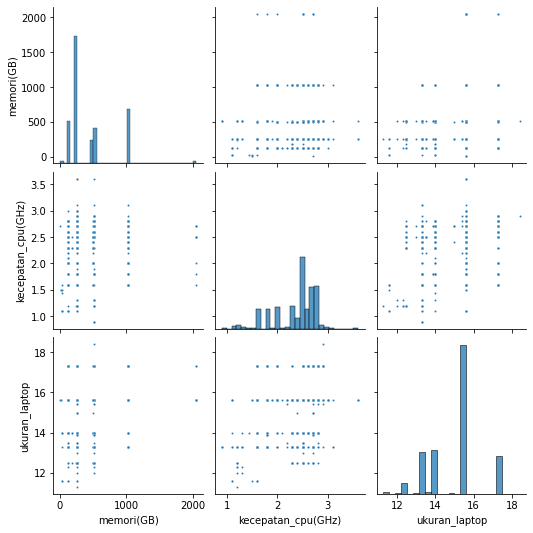

In [ ]:
#plot menggunakan seaborn pairplot untuk mengetahui visualisasi seluruh atribut
sns.pairplot(X_train[['ram','memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']], plot_kws={"s": 4});

In [ ]:
#lihat data train
X_train

,ukuran_laptop,ram,memori(GB),kecepatan_cpu(GHz)
659,17.3,32,512,2.8
242,17.3,8,128,2.7
359,14.0,8,256,2.6
1014,13.3,4,500,2.4
567,15.6,8,1024,2.5
...,...,...,...,...
1175,14.0,4,256,2.4
1234,11.6,4,256,1.6
1283,15.6,4,500,2.5
972,17.3,32,256,2.6


In [ ]:
#lihat data tes
X_test

,ukuran_laptop,ram,memori(GB),kecepatan_cpu(GHz)
178,15.6,8,128,2.5
1217,17.3,8,1024,2.5
322,14.0,8,256,2.7
603,17.3,16,128,2.7
411,14.0,8,512,2.8
...,...,...,...,...
230,15.6,4,1024,2.4
594,17.3,4,500,2.0
339,15.6,8,256,1.6
761,12.5,16,256,2.8


In [ ]:
#Skala fitur numerik kita sehingga mereka memiliki nol berarti dan varian satu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['ram',	'memori(GB)','kecepatan_cpu(GHz)','ukuran_laptop']
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ram,memori(GB),kecepatan_cpu(GHz),ukuran_laptop
659,4.426081,0.184104,0.984395,1.656482
242,-0.185995,-0.919847,0.750081,1.656482
359,-0.185995,-0.551863,0.515766,-0.804928
1014,-0.954674,0.149605,0.047137,-1.327045
567,-0.185995,1.656038,0.281451,0.388483


# Model Development

Saya memilih 2 model yaitu Lasso Regression dan Random Forest.
Mirip dengan regresi Ridge, regresi Lasso juga membantu mengatur model dan dapat sangat membantu model untuk memprediksi data yang tidak terlihat. Namun, regresi Lasso sedikit berbeda dengan regresi ridge. Mari kita mulai dengan rumusnya. Alih-alih menggunakan penalti yang mengkuadratkan lereng, Lasso akan menggunakan persamaan yang sama tetapi menggunakan nilai absolut dari gradien daripada mengkuadratkannya. Ini akan mengambil jumlah dari residu kuadrat + lambda * nilai absolut dari kemiringannya. Di Lasso, alih-alih hanya menghukum fitur yang kurang penting saat menggunakan Ridge, Lasso dapat mengurangi fitur agar tidak berdampak pada model akhir. Ini akan meninggalkan model yang jauh lebih sederhana daripada saat kita mulai. Ini bisa sangat membantu dalam menafsirkan model.
(https://ichi.pro/id/pengantar-ridge-dan-regresi-lasso-255856152895440)

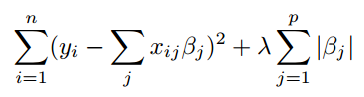

Selain itu saya menggunakan model Random Forest. Survei literatur membantu saya menyimpulkan bahwa algoritma pembelajaran Ensemble tetap tidak dimanfaatkan dalam masalah prediksi harga. Random Forest adalah banyak pohon keputusan yang outputnya adalah mode dari output dari masing-masing pohon. (https://c.mql5.com/forextsd/forum/224/Predicting%20the%20direction%20of%20stock%20market%20prices%20using%20random%20forest.pdf)

In [ ]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['Lasso', 'RandomForest'])

In [ ]:
#model linear lasso
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
reg.predict(X_train)
models.loc['train_mse','Lasso'] = sqrt(mean_squared_error(y_pred=reg.predict(X_train), y_true=y_train))

In [ ]:
# Import library yang dibutuhkan
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi random forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = sqrt(mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train))

# Evaluation

Menggunakan model evaluasi RMSE 

Root Mean Square Error (RMSE) adalah  metode pengukuran dengan mengukur perbedaan nilai dari prediksi sebuah model sebagai estimasi atas nilai yang diobservasi. Root Mean Square Error adalah hasil dari akar kuadrat Mean Square Error. Keakuratan metode estimasi kesalahan pengukuran ditandai dengan adanya nilai RMSE yang kecil. Metode estimasi yang mempunyai Root Mean Square Error (RMSE) lebih kecil dikatakan lebih akurat daripada metode estimasi yang mempunyai Root Mean Square Error (RMSE) lebih besar.

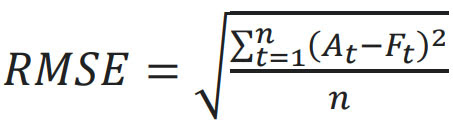


In [ ]:
#lakukan standarisasi pada data tes yang dibutuhkan untuk evaluasi matriksnya
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#buat dataframe baru pada tiap model (data latih dan tes) dengan nilai matriks rmse nya
rmse = pd.DataFrame(columns=['train', 'test'], index=['Lasso','RF'])
model_dict = {'Lasso': reg, 'RF': RF}
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3)
    rmse.loc[name, 'test'] = sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3)
rmse

,train,test
Lasso,13.9785,14.8745
RF,8.5432,12.4611


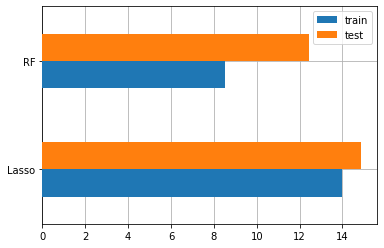

In [ ]:
#plot metrik diatas dengan bar chart
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
# buat prediksi menggunakan harga dari data test
prediksi = X_test.copy()
pred_dict = {'y_true':y_test}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_Lasso,prediksi_RF
178,813.00,1190.559643,853.924959
1217,539.00,836.724610,839.275515
322,1094.00,1360.935170,1530.705510
603,2199.00,1841.340890,2407.113920
411,1943.00,1331.233009,1731.677800
...,...,...,...
230,398.99,587.548866,480.723509
594,529.00,441.536414,660.989857
339,1142.75,911.207630,908.289405
761,1859.00,2270.800817,2005.476652
